In [1]:
import tensorflow as tf
from keras.src import layers
from keras.src.callbacks import EarlyStopping, ReduceLROnPlateau
import keras
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Preprocess data
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Reshape to (28, 28, 1) for CNN
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

In [3]:
model = keras.Sequential([
    layers.Input((28, 28, 1)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (5, 5), strides=2,activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (5, 5), strides=2,activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Conv2D(128, (4, 4), strides=2,activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')
])

In [4]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor="val_accuracy",
    patience=3,  
    restore_best_weights=True
)

lr_schedule = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=2,  
    min_lr=1e-5,  
    verbose=1
)

history = model.fit(
    train_images,
    train_labels,
    epochs=10,          
    batch_size=128,     
    validation_split=0.05,  
    callbacks=[early_stop, lr_schedule],
    verbose=1
)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")

Epoch 1/10
446/446 [==============================] - 210s 467ms/step - loss: 0.1919 - accuracy: 0.9439 - val_loss: 0.1112 - val_accuracy: 0.9697 - lr: 0.0010
Epoch 2/10
446/446 [==============================] - 202s 452ms/step - loss: 0.0541 - accuracy: 0.9839 - val_loss: 0.0678 - val_accuracy: 0.9780 - lr: 0.0010
Epoch 3/10
446/446 [==============================] - 224s 503ms/step - loss: 0.0408 - accuracy: 0.9874 - val_loss: 0.0528 - val_accuracy: 0.9867 - lr: 0.0010
Epoch 4/10
446/446 [==============================] - 233s 522ms/step - loss: 0.0330 - accuracy: 0.9897 - val_loss: 0.0197 - val_accuracy: 0.9940 - lr: 0.0010
Epoch 5/10
446/446 [==============================] - 247s 553ms/step - loss: 0.0278 - accuracy: 0.9914 - val_loss: 0.0252 - val_accuracy: 0.9927 - lr: 0.0010
Epoch 6/10
446/446 [==============================] - ETA: 0s - loss: 0.0250 - accuracy: 0.9924
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
446/446 [========================

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 [==============================] - 9s 28ms/step - loss: 0.0135 - accuracy: 0.9959

Test accuracy: 0.9959


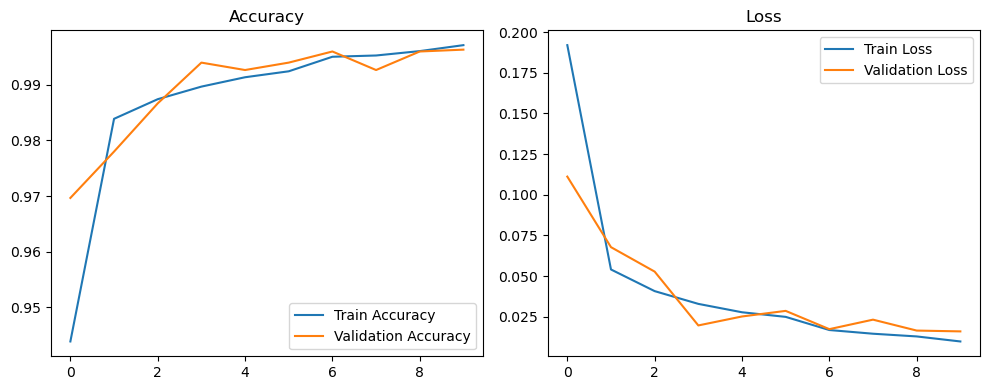

In [7]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()

| **Component**              | **Value**                                   |
| -------------------------- | ------------------------------------------- |
| **Optimizer**              | RMSprop(learning_rate=0.001, rho=0.9)`      |
| **Loss Function**          | sparse_categorical_crossentropy             |
| **Batch Size**             | 64                                          |
| **Epochs**                 | Up to 100 (early stopped at 31)             |
| **Learning Rate Schedule** | ReduceLROnPlateau(patience=3, factor=0.5)   |
| **Regularization**         | Dropout (0.4) + BatchNormalization          |
| **Final Downsampling**     | GlobalAveragePooling2D()`                   |
| **Train Accuracy (Final)** | ~0.995                                      |
| **Validation Accuracy**    | ~0.995                                      |
| **Train Loss (Final)**     | ~0.010                                      |
| **Validation Loss**        | ~0.015                                      |
